In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
pwd

'C:\\Users\\Alvaro Camacho\\Desktop\\Ironhack\\week 6 Remote'

In [3]:
diamonds = pd.read_csv('asset-v1_IRONHACK+DAFT+202002_SAO+type@asset+block@diamonds.csv')

In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [5]:
diamonds.price.mean()

3934.409644462607

### Since the mean value is far off the average error we look at the dataset closely to see if we can improve it more.

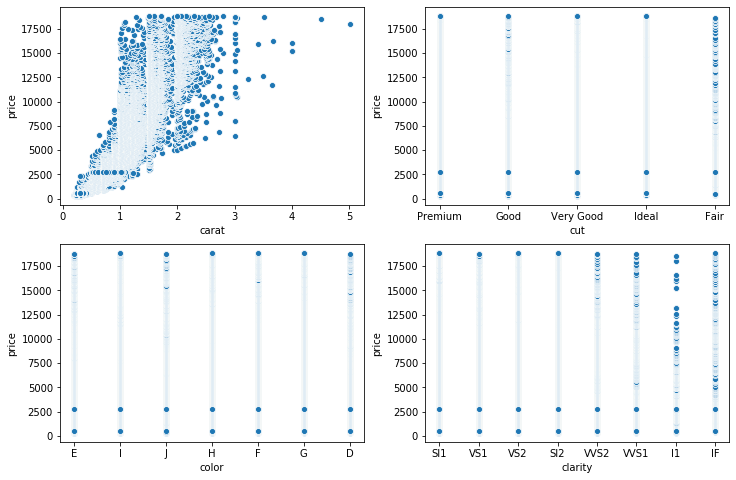

In [17]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
sns.scatterplot(diamonds['carat'], diamonds['price'], ax= ax[0,0])
sns.scatterplot(diamonds['cut'], diamonds['price'], ax= ax[0,1])
sns.scatterplot(diamonds['color'], diamonds['price'], ax= ax[1,0])
sns.scatterplot(diamonds['clarity'], diamonds['price'], ax= ax[1,1])


### Now,  there is correlation between carat and price, we can go ahead and estimate price based on carat. Then we build a model

In [18]:
model = LinearRegression()
X = diamonds[['carat']]
y = diamonds['price']
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[7759.35277644] -2256.1316930741527


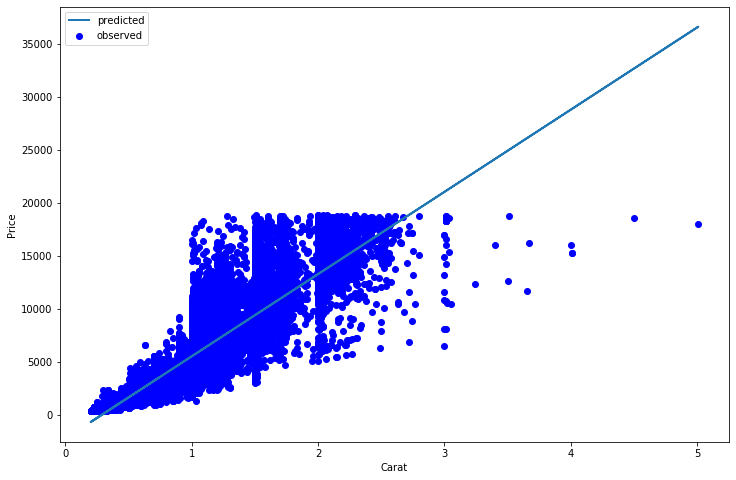

In [19]:
y_pred = model.predict(X)
y_pred
plt.figure(figsize=(12,8))
plt.xlabel('Carat')
plt.ylabel('Price')
plt.scatter(X, y, color='blue', label='observed')
plt.plot(X, y_pred, label='predicted', lw=2)
plt.legend()
print(model.coef_, model.intercept_)

In [23]:
from sklearn.metrics import mean_squared_error

y_observed = diamonds['price']
y_predicted = model.predict(diamonds[['carat']])
mse = mean_squared_error(y_observed, y_predicted)
mse

2380375.235074832

In [27]:
np.sqrt(mse)

1542.8464716474002

### The MSE gives us a squared error of USD 1540 approximately, so it could be a good starting point.

In [6]:
ricks = pd.read_csv('asset-v1_IRONHACK+DAFT+202002_SAO+type@asset+block@rick_diamonds.csv')
ricks.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


In [34]:
ricks['price_predicted'] = model.predict(ricks[['carat']]).astype(int)

In [35]:
ricks.head()

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,4804
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,692
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,1778
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,6279
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,15435


In [30]:
ricks.shape

(5000, 10)

In [36]:
ricks.to_csv('ricks_raw.csv')